## Fractal Assignment :: MMM

### PyQ3

### The below is the provided code snippet

In [3]:
import pandas as pd

data = {
         
         'Name': ['Employee_1', 'Employee_2', 'Employee_3', 'Employee_4', 'Employee_5', 
                 'Employee_6', 'Employee_7', 'Employee_8', 'Employee_9', 'Employee_10', 
                 'Employee_11', 'Employee_12', 'Employee_13', 'Employee_14', 'Employee_15', 
                 'Employee_16', 'Employee_17', 'Employee_18', 'Employee_19', 'Employee_20', 
                 'Employee_21', 'Employee_22', 'Employee_23', 'Employee_24', 'Employee_25', 
                 'Employee_26', 'Employee_27', 'Employee_28', 'Employee_29', 'Employee_30'],
        
        'Salary': [54895.0, 38784.0, 120000.0, 60309.0, 46788.0, 50598.0, 61915.0, 50651.0, 
                   38155.0, 55480.0, 49396.0, 64183.0, 38894.0, 46672.0, 20000.0, 57935.0,
                   57055.0, 44719.0, 66267.0, 48339.0, 44490.0, 48817.0, 39738.0, 59433.0,
                   80823.0, 80000.0, 52704.0, 54168.0, 56569.0, 45481.0],
        
        'Age': [49, 48, 34, 33, 59, 36, 34, 30, 36, 29, 29, 54, 55, 29, 53, 34, 23, 41, 58,
                41, 45, 22, 39, 47, 22, 30, 53, 33, 23, 52],
        
        'Function': ['HR', 'Sales', 'Manager', 'Manager', 'HR', 'Sales', 'Manager', 'HR', 'Sales',
                     'HR', 'Sales', 'Developer', 'Developer', 'Sales', 'HR', 'Sales', 'Developer', 
                     'Developer', 'HR', 'Sales', 'HR', 'Manager', 'HR', 'Sales', 'HR', 'Sales', 
                     'Sales', 'Developer', 'Developer', 'HR']
        }

In [4]:
# Convert to DataFrame
df = pd.DataFrame(data)

# Display the DataFrame
print(df.head())

         Name    Salary  Age Function
0  Employee_1   54895.0   49       HR
1  Employee_2   38784.0   48    Sales
2  Employee_3  120000.0   34  Manager
3  Employee_4   60309.0   33  Manager
4  Employee_5   46788.0   59       HR


In [5]:
# Define the department to code mapping
department_mapping = {
'HR': 'HR001',
'Sales': 'SAL002',
'Manager': 'MGR003',
'Developer': 'DEV004'
}

In [6]:
# Convert the dictionary to a DataFrame
department_df = pd.DataFrame(list(department_mapping.items()), columns=['Department', 'Department_Code'])

In [7]:
# Display the DataFrame
print(department_df)

  Department Department_Code
0         HR           HR001
1      Sales          SAL002
2    Manager          MGR003
3  Developer          DEV004


### Questions

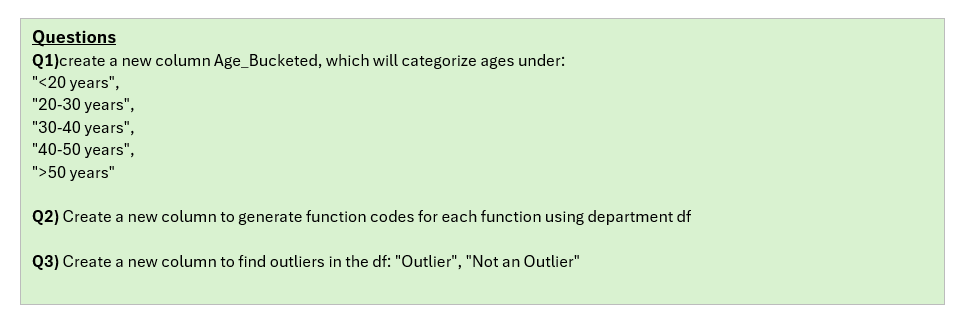

### Q1) Create a new column Age_Bucketed, which will categorize ages under:
 **"<20 years",  "20-30 years",  "30-40 years",  "40-50 years",  ">50 years"**


In [8]:
df.head(5)

,Name,Salary,Age,Function
0,Employee_1,54895.0,49,HR
1,Employee_2,38784.0,48,Sales
2,Employee_3,120000.0,34,Manager
3,Employee_4,60309.0,33,Manager
4,Employee_5,46788.0,59,HR


In [9]:
# Creating function map values
def setAgeBucketed(age):
    
    if age<20:
        return "<20 years"
    
    elif age>=20 and age<30:
        return "20-30 years"
    
    elif age>=30 and age<40:
        return "30-40 years"
    
    elif age>=40 and age<50:
        return "40-50 years"
    
    else:
        return ">50 years"
    
df["AgeBucketed"] = df.Age.apply(setAgeBucketed)
df.head()

,Name,Salary,Age,Function,AgeBucketed
0,Employee_1,54895.0,49,HR,40-50 years
1,Employee_2,38784.0,48,Sales,40-50 years
2,Employee_3,120000.0,34,Manager,30-40 years
3,Employee_4,60309.0,33,Manager,30-40 years
4,Employee_5,46788.0,59,HR,>50 years


### Q2) Create a new column to generate function codes for each function using department df.


In [11]:
df.merge(department_df, how = "left",left_on="Function", right_on="Department").head()

,Name,Salary,Age,Function,AgeBucketed,Department,Department_Code
0,Employee_1,54895.0,49,HR,40-50 years,HR,HR001
1,Employee_2,38784.0,48,Sales,40-50 years,Sales,SAL002
2,Employee_3,120000.0,34,Manager,30-40 years,Manager,MGR003
3,Employee_4,60309.0,33,Manager,30-40 years,Manager,MGR003
4,Employee_5,46788.0,59,HR,>50 years,HR,HR001


### Q3) Create a new column to find outliers in the df: "Outlier", "Not an Outlier"


Before finding outlier we need to determine a specific column from the given dataset.That is salary.

In [12]:
Q3 = df.Salary.quantile(q=0.75)
Q1 = df.Salary.quantile(q=0.25)

IQR = Q3 - Q1

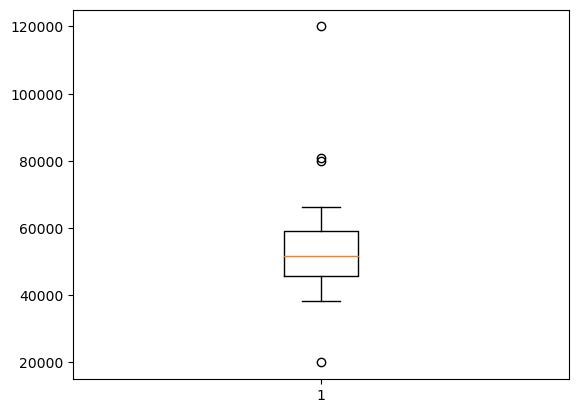

In [55]:
import matplotlib.pyplot as plt

plt.boxplot(df.Salary)
plt.show()

**As per above visual outliers are detected.**

In [14]:
upper_limit = Q3 + 1.5*IQR
lower_limit = Q1 - 1.5*IQR

In [16]:
df["QutlierOrNot"] = df.Salary.apply(lambda x : "Outlier" if x<lower_limit or x>upper_limit else "Not an Outlier")

In [40]:
df.head()

,Name,Salary,Age,Function,AgeBucketed,QutlierOrNot
0,Employee_1,54895.0,49,HR,40-50 years,Not an Outlier
1,Employee_2,38784.0,48,Sales,40-50 years,Not an Outlier
2,Employee_3,120000.0,34,Manager,30-40 years,Outlier
3,Employee_4,60309.0,33,Manager,30-40 years,Not an Outlier
4,Employee_5,46788.0,59,HR,>50 years,Not an Outlier


**Visual after removing outliers.**

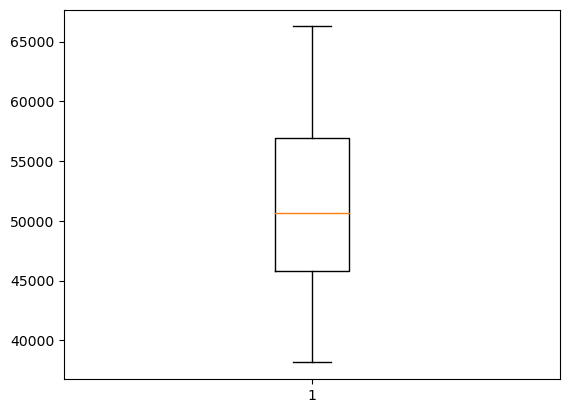

In [53]:
plt.boxplot(df.Salary[(df.Salary > lower_limit) & (df.Salary < upper_limit)])
plt.show()